## Using OpenForce toolkit to parameterize molecules

In [1]:
from openff.toolkit import Molecule, Topology, ForceField
from openff.interchange import Interchange
from openff.units import unit, Quantity
import numpy as np

Define a molecule via SMILES 1D representation

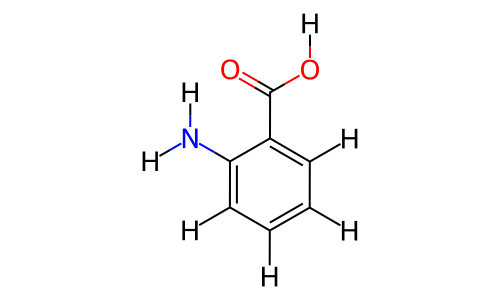

In [2]:
test_molecule = Molecule.from_smiles("Nc1ccccc1C(=O)O")
test_molecule.visualize()

In [3]:
# use RDkit to generate a conformer
test_molecule.generate_conformers(n_conformers=1)

In [4]:
# create the internal representation
topology = Topology.from_molecules(test_molecule)

# assign a force field
sage = ForceField("openff-2.2.0.offxml")

#Define the box
cubic_box = unit.Quantity(30 * np.eye(3), unit.angstrom)

# create the interchange object
solute_interchange = Interchange.from_smirnoff(topology=[test_molecule], force_field=sage, box = cubic_box)

# approximately minimize energy
solute_interchange.minimize()

In [5]:
# create gromacs files
solute_interchange.to_gro('test_molecule.gro')
solute_interchange.to_top('test_molecule.top')

In [6]:
# create lammps files
solute_interchange.to_lammps('test_molecule.lmp')

In [7]:
# create amber files
solute_interchange.to_prmtop('test_molecule.prmtop') 
solute_interchange.to_inpcrd("test_molecule.inpcrd")

In [8]:
# create openmm objects
openmm_top = solute_interchange.to_openmm()

### Solvating the ligand in water

In [9]:
# Construct a water molecule
water = Molecule.from_smiles("O")
water.generate_conformers(n_conformers=1)

In [10]:
# Pack the box with an arbitrary number of water
n_water = 900

from openff.interchange.components._packmol import pack_box
packed_topology = pack_box(
    molecules=[water],
    number_of_copies=[n_water],
    solute=Topology.from_molecules(test_molecule),
    tolerance=0.5*unit.angstrom,
    box_vectors=cubic_box,
)

In [ ]:
solvated_interchange = Interchange.from_smirnoff(
    force_field=ForceField("openff-2.2.0.offxml","opc3.offxml"),
    topology=packed_topology,
    box=cubic_box
)

In [ ]:
# gromacs files
solvated_interchange.to_gro('solvated_molecule.gro')
solvated_interchange.to_top('solvated_molecule.top')

In [ ]:
# lammps files
solvated_interchange.to_lammps('solvated_molecule.lmp')

In [ ]:
solvated_interchange.to_prmtop('solvated_molecule.prmtop') 
solvated_interchange.to_inpcrd("solvated_molecule.inpcrd")